In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
from utilities.constants import *
from utilities.utilities import *

NAWBA = "al-rasd" #"al-istihlal","al-rasd","All"

SCORES_DIR = os.path.join(SCORES_DIR,NAWBA)

if not os.path.exists(PLOTS_DIR): os.mkdir(PLOTS_DIR)
PLOTS_DIR = os.path.join(PLOTS_DIR,NAWBA)

if not os.path.exists(SCORES_DIR): raise ValueError("Download the scores first")
if os.path.exists(PLOTS_DIR): shutil.rmtree(PLOTS_DIR, ignore_errors=True)
os.mkdir(PLOTS_DIR)
    

# Organise files in documents

In [2]:
#print("{0}{1}{2}".format("Formatting files in ", SCORES_DIR, " and storing them in the scores folder..."))

#organize_xml_files(SCORES_DIR)

#print("Done")

# Music21 Settings

In [3]:
#show_music21_settings()

Load the scores and get the ascending and descending distributions in the dataframe

In [4]:
pitchclass_df_asc = get_all_pitchclassdistribution_df(SCORES_DIR, "asc", distance_th = DISTANCE_TH, plots_dir = PLOTS_DIR)
pitchclass_df_desc = get_all_pitchclassdistribution_df(SCORES_DIR, "desc", distance_th = DISTANCE_TH, plots_dir = PLOTS_DIR)


Replace all Nan with 0 values as they mean that there were no notes of this pitch class in that file

In [5]:
pitchclass_df_asc = add_missing_columns(pitchclass_df_asc)
pitchclass_df_asc = sort_df_columns_int(pitchclass_df_asc)

pitchclass_df_desc = add_missing_columns(pitchclass_df_desc)
pitchclass_df_desc = sort_df_columns_int(pitchclass_df_desc)

Plot the DataFrames side by side for comparison

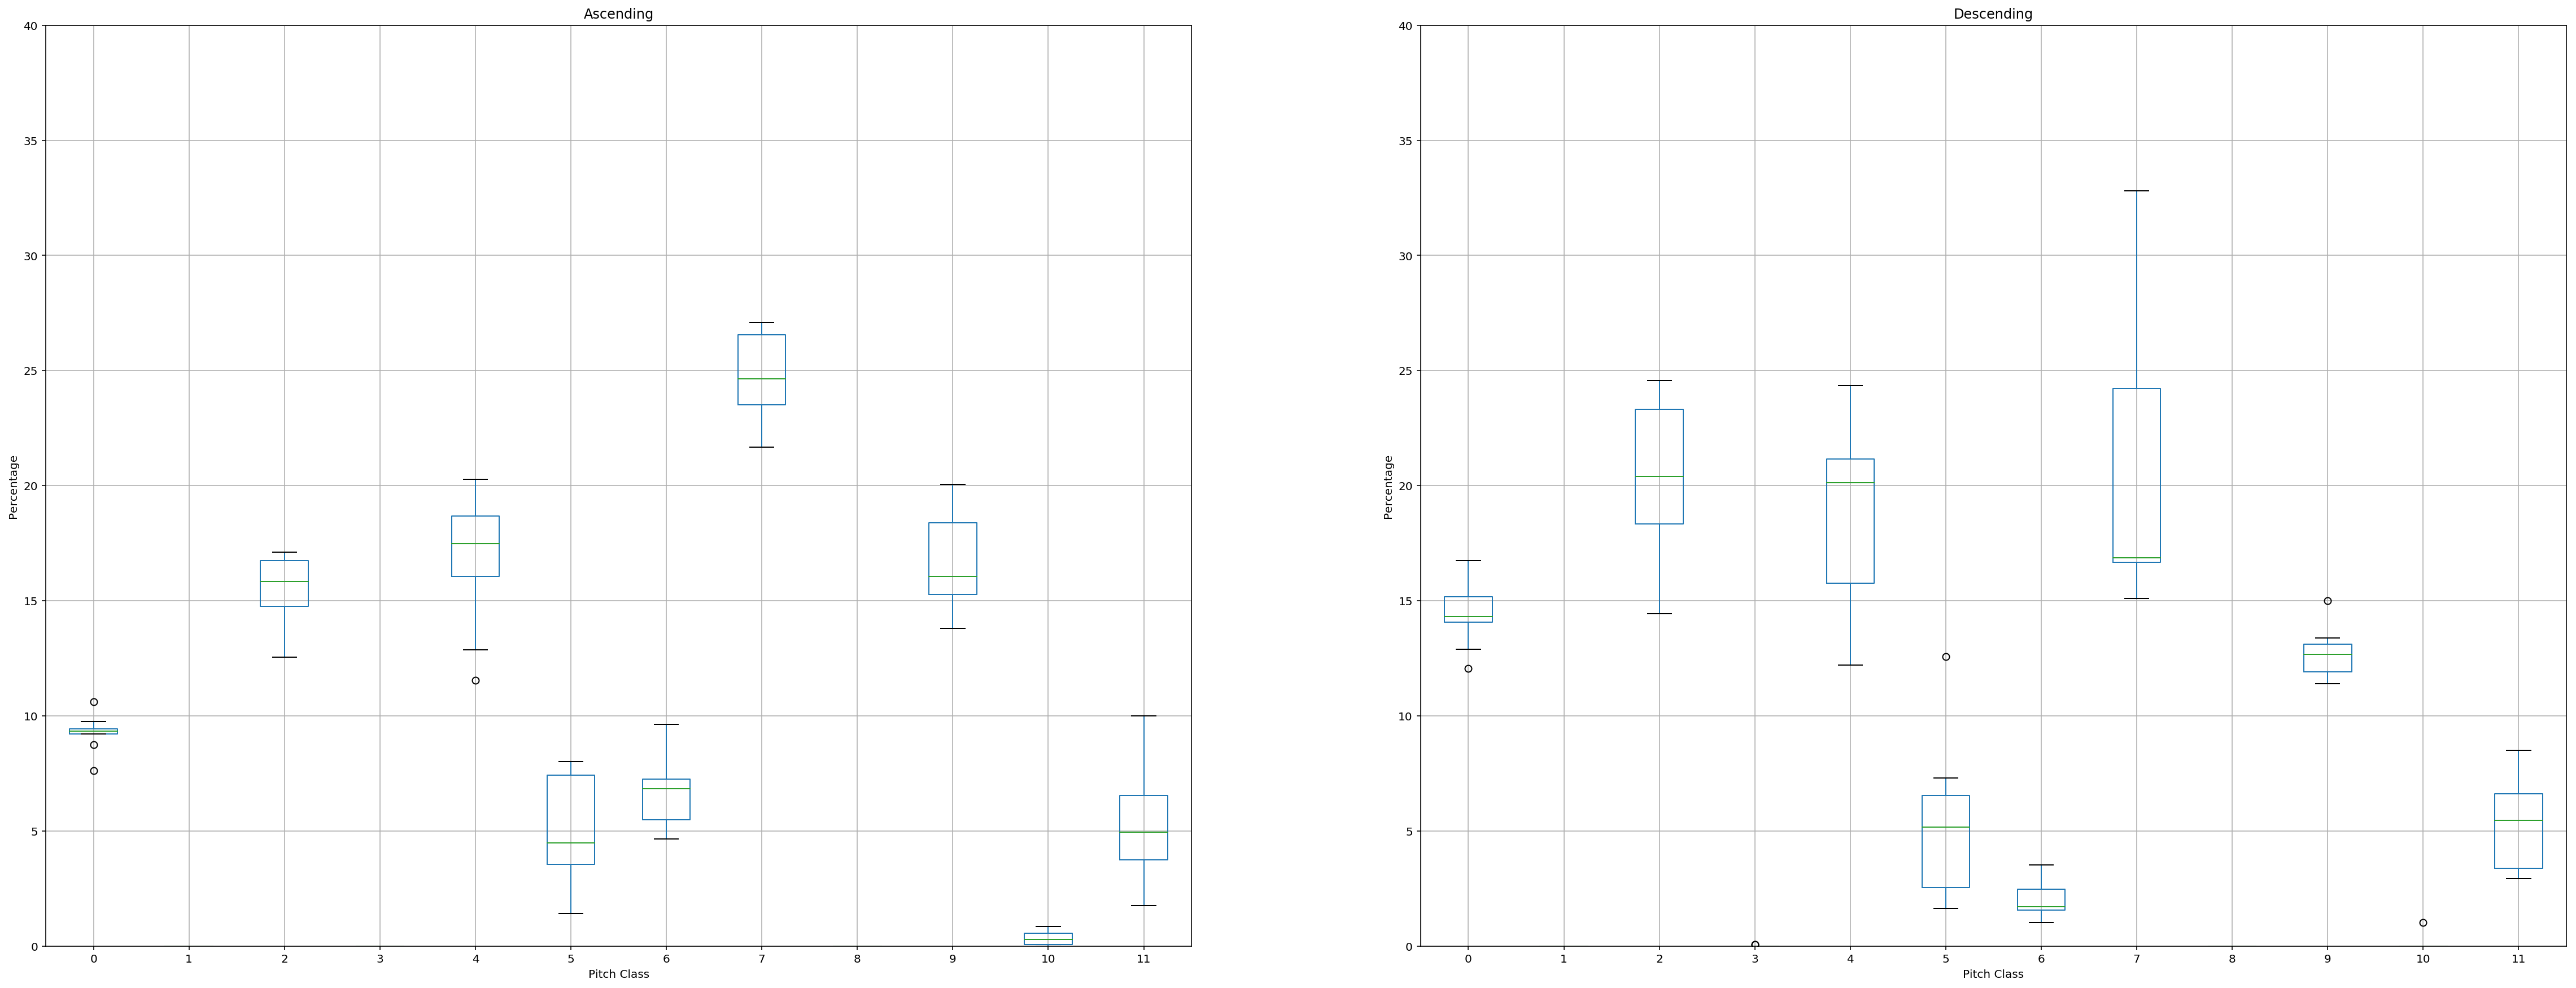

In [6]:
f, axs = plt.subplots(1,2,figsize=(40,15))

axs[0] = pitchclass_df_asc.boxplot(ax=axs[0])
axs[1] = pitchclass_df_desc.boxplot(ax=axs[1])

axs[0].set_title("Ascending")
axs[0].set_xlabel("Pitch Class")
axs[0].set_ylabel("Percentage")
axs[0].set_ylim(0, 40)

axs[1].set_title("Descending")
axs[1].set_xlabel("Pitch Class")
axs[1].set_ylabel("Percentage")
axs[1].set_ylim(0, 40)

filename = os.path.join(PLOTS_DIR,"{0}_both_{1}_distance.png".format(NAWBA,DISTANCE_TH))

f.savefig(filename)

Plot the mean of the distributions as a single barplot

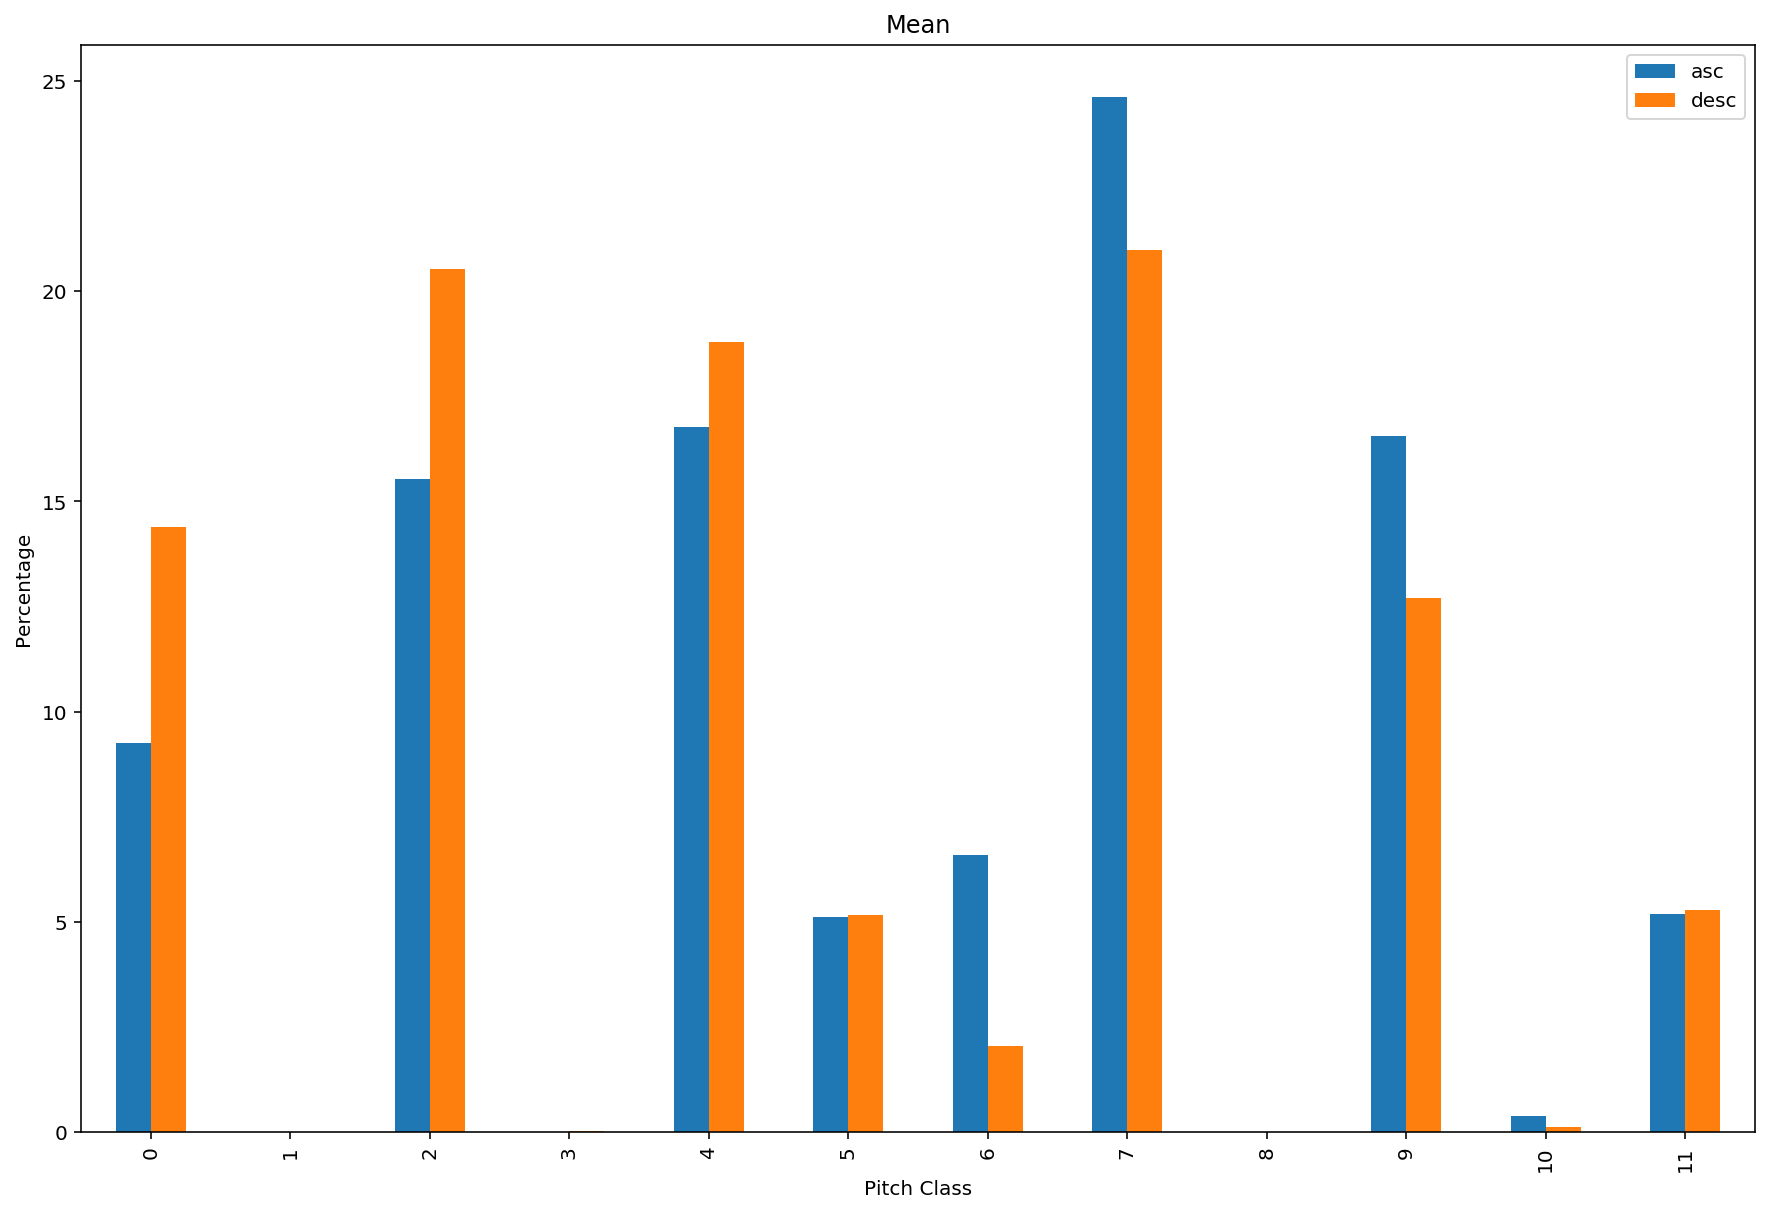

In [7]:
mean_array_asc = np.array(pitchclass_df_asc.sum(axis=0).tolist())/(len(pitchclass_df_asc.index.tolist()))
mean_array_desc = np.array(pitchclass_df_desc.sum(axis=0).tolist())/(len(pitchclass_df_desc.index.tolist()))

mean_df = pd.DataFrame({"asc":mean_array_asc, "desc":mean_array_desc})
mean_df.plot.bar(figsize=(15,10))

filename = os.path.join(PLOTS_DIR,"{0}_both_{1}_mean.png".format(NAWBA,DISTANCE_TH))

plt.title("Mean")
plt.xlabel("Pitch Class")
plt.ylabel("Percentage")
plt.savefig(filename)